<a href="https://colab.research.google.com/github/ELiTE0005/2FA-RFID/blob/main/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Columns Explanation:


# session_id (categorical, object) – A unique identifier for each session.

# network_packet_size (numerical, int64) – Size of network packets exchanged in a session.

# protocol_type (categorical, object) – Type of protocol used (e.g., TCP, UDP).

# login_attempts (numerical, int64) – Number of login attempts made during the session.

# session_duration (numerical, float64) – Duration of the session in seconds.

# encryption_used (categorical, object) – Type of encryption used (e.g., AES, DES).

# ip_reputation_score (numerical, float64) – A score indicating the trustworthiness of the IP.

# failed_logins (numerical, int64) – Number of failed login attempts.

# browser_type (categorical, object) – The browser used in the session (e.g., Chrome, Firefox, Edge).

# unusual_time_access (numerical, int64: 0 or 1) – Whether access happened at an unusual time (0 = No, 1 = Yes).

# attack_detected (numerical, int64: 0 or 1) – Whether an attack was detected in the session (0 = No, 1 = Yes).

In [38]:
# Reload the newly uploaded dataset


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


file_path = "/content/cybersecurity_intrusion_data.csv"
df = pd.read_csv(file_path)

# Drop 'session_id' if it exists and encode categorical variables
if 'session_id' in df.columns:
    df.drop(columns=['session_id'], inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['attack_detected'])
y = df['attack_detected']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Evaluate model accuracy
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


#The Logistic Regression model is predicting whether a given session in the dataset is an attack or not an attack based on various features.
accuracy


0.7473794549266247

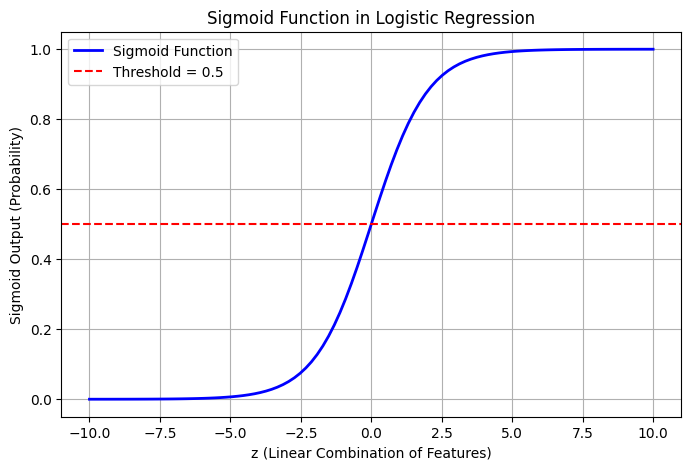

In [41]:
import numpy as np

# Sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute sigmoid values for visualization
z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)

# Plot the sigmoid function
plt.figure(figsize=(8, 5))
plt.plot(z_values, sigmoid_values, color='blue', linewidth=2, label="Sigmoid Function")
plt.xlabel("z (Linear Combination of Features)")
plt.ylabel("Sigmoid Output (Probability)")
plt.title("Sigmoid Function in Logistic Regression")
plt.axhline(y=0.5, color='red', linestyle='--', label="Threshold = 0.5")
plt.legend()
plt.grid()
plt.show()


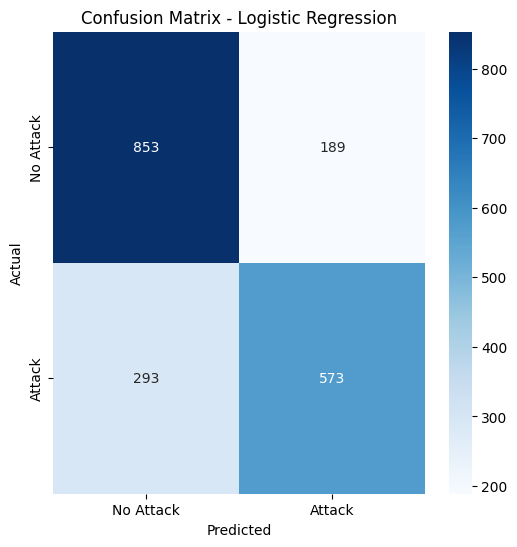

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attack', 'Attack'], yticklabels=['No Attack', 'Attack'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()